# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [23]:
dataset_train = pd.read_csv('BTC_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 20 timesteps and 1 output

In [25]:
X_train = []
y_train = []
for i in range(20, 2449):
    X_train.append(training_set_scaled[i-20:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [26]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [28]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [29]:
regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.3))

### Adding a second LSTM layer and some Dropout regularisation

In [30]:
regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(Dropout(0.3))

### Adding a third and fourth LSTM layer and some Dropout regularisation

In [31]:
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(Dropout(0.3))

### Adding a fifth LSTM layer and some Dropout regularisation

In [32]:
regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.3))

### Adding the output layer

In [33]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [34]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [35]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
76/76 [==============================] - 17s 89ms/step - loss: 0.0053
Epoch 2/100
76/76 [==============================] - 5s 72ms/step - loss: 0.0025
Epoch 3/100
76/76 [==============================] - 7s 87ms/step - loss: 0.0025
Epoch 4/100
76/76 [==============================] - 5s 71ms/step - loss: 0.0021
Epoch 5/100
76/76 [==============================] - 7s 87ms/step - loss: 0.0021
Epoch 6/100
76/76 [==============================] - 5s 72ms/step - loss: 0.0023
Epoch 7/100
76/76 [==============================] - 7s 87ms/step - loss: 0.0020
Epoch 8/100
76/76 [==============================] - 6s 73ms/step - loss: 0.0017
Epoch 9/100
76/76 [==============================] - 6s 80ms/step - loss: 0.0018
Epoch 10/100
76/76 [==============================] - 6s 77ms/step - loss: 0.0018
Epoch 11/100
76/76 [==============================] - 6s 73ms/step - loss: 0.0016
Epoch 12/100
76/76 [==============================] - 7s 86ms/step - loss: 0.0014
Epoch 13/100
76/76 [====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [36]:
dataset_test = pd.read_csv('BTC_Test.csv', engine='python')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [37]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 20:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(20, 580):
    X_test.append(inputs[i-20:i, 0])
X_test = np.array(X_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

(560, 20)
18/18 [==============================] - 7s 45ms/step


### Visualising the results

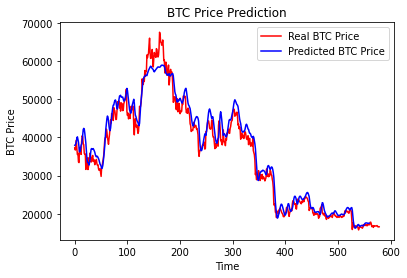

In [40]:
plt.plot(real_stock_price, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Price')
plt.legend()
plt.show()